In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import os
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import pprint
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
from PIL import Image, ImageDraw, ImageFilter



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
os.chdir('drive/My Drive/Session 14 ac3')
!ls

BG  EVA_S14_processac3.ipynb  FG  Masks  overlayed


In [ ]:
 
import cv2
from google.colab.patches import cv2_imshow

 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
for bg_i in tqdm(range(100,101)): 
  os.mkdir('overlayed/'+str(bg_i)+'bg')
  os.mkdir('Masks/'+str(bg_i)+'bg')
  for fg_i in tqdm(range(1,201)): #201
    os.mkdir('overlayed/'+str(bg_i)+'bg/'+'fg'+str(fg_i))
    os.mkdir('Masks/'+str(bg_i)+'bg/'+'fg'+str(fg_i))
    for fg_iter in range(1,21): #21
      
      fg = Image.open('FG/FG_P/sized/'+str(fg_i)+'fg_p.png', 'r')
      bg = Image.open('BG/sized/'+str(bg_i)+'bg.jpeg', 'r')
      rand_H =random.randint(0, 50)
      rand_W= random.randint(0, 50)
      bg.paste(fg, (rand_H,rand_W), mask=fg)
      bg.save('overlayed/'+str(bg_i)+'bg/'+'fg'+str(fg_i)+'/'+'bg_'+str(bg_i)+ 'fg_'+str(fg_i)+'iter'+str(fg_iter)+'.png', format="png")
      
      #FG MASKSa
      fg_MASK = Image.open('FG/masks/sized/'+str(fg_i)+'fg_pm.png', 'r').convert("RGBA")
      text_img = Image.new('RGBA', (128,128), (0, 0, 0))
      text_img.paste(fg_MASK,(rand_H,rand_W), mask=fg_MASK)
      text_img.save('Masks/'+str(bg_i)+'bg/'+'fg'+str(fg_i)+'/'+'bg_mask'+str(bg_i)+ 'fg_'+str(fg_i)+'iter'+str(fg_iter)+'.png', format="png")


      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


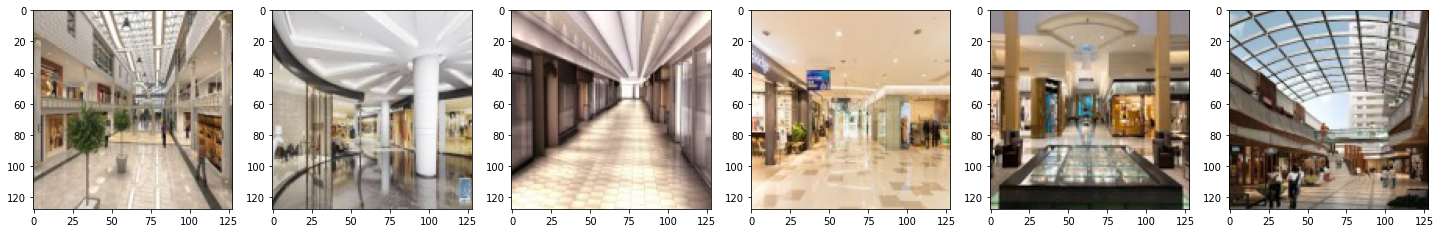

In [ ]:

f,axarr = plt.subplots(1,6)
f.set_figheight(25)
f.set_figwidth(25)

axarr[0].imshow(mpimg.imread('BG/sized/1bg.jpeg'))
axarr[1].imshow(mpimg.imread('BG/sized/2bg.jpeg'))
axarr[2].imshow(mpimg.imread('BG/sized/3bg.jpeg'))
axarr[3].imshow(mpimg.imread('BG/sized/4bg.jpeg'))
axarr[4].imshow(mpimg.imread('BG/sized/5bg.jpeg'))
axarr[5].imshow(mpimg.imread('BG/sized/6bg.jpeg'))


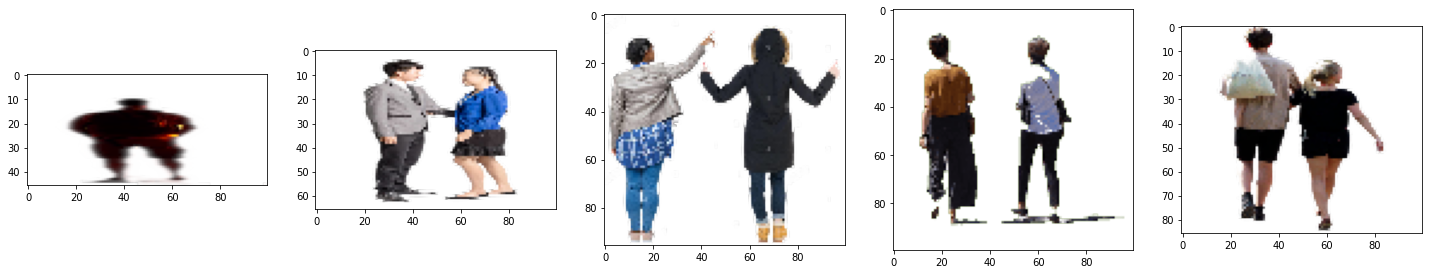

In [ ]:

f, axarr = plt.subplots(1,5)
f.set_figheight(25)
f.set_figwidth(25)

axarr[0].imshow(mpimg.imread('FG/FG_P/sized/1fg_p.png'))
axarr[1].imshow(mpimg.imread('FG/FG_P/sized/2fg_p.png'))
axarr[2].imshow(mpimg.imread('FG/FG_P/sized/5fg_p.png'))
axarr[3].imshow(mpimg.imread('FG/FG_P/sized/6fg_p.png'))
axarr[4].imshow(mpimg.imread('FG/FG_P/sized/7fg_p.png'))


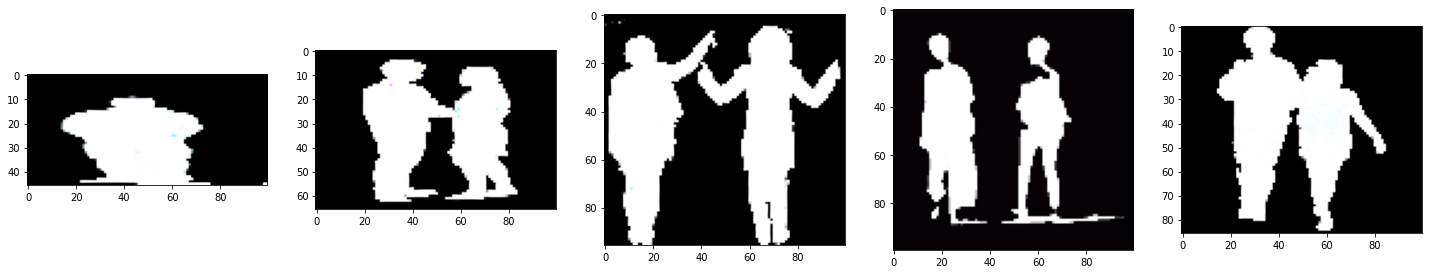

In [ ]:

f, axarr = plt.subplots(1,5)
f.set_figheight(25)
f.set_figwidth(25)

axarr[0].imshow(mpimg.imread('FG/masks/sized/1fg_pm.png'))
axarr[1].imshow(mpimg.imread('FG/masks/sized/2fg_pm.png'))
axarr[2].imshow(mpimg.imread('FG/masks/sized/5fg_pm.png'))
axarr[3].imshow(mpimg.imread('FG/masks/sized/6fg_pm.png'))
axarr[4].imshow(mpimg.imread('FG/masks/sized/7fg_pm.png'))


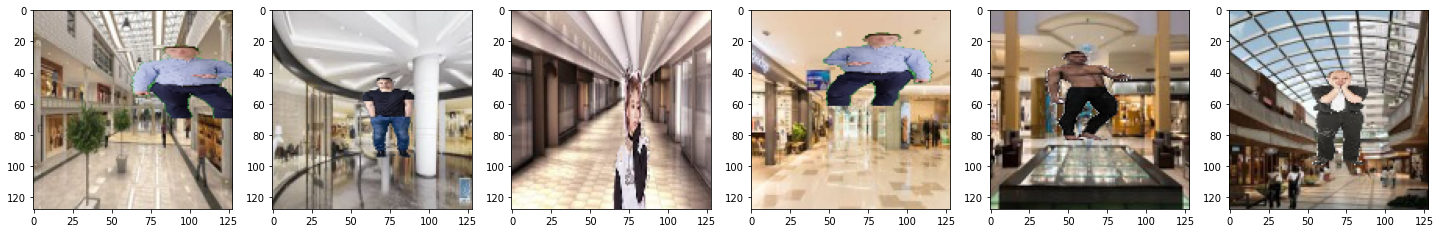

In [ ]:

f, axarr = plt.subplots(1,6)
f.set_figheight(25)
f.set_figwidth(25)

axarr[0].imshow(mpimg.imread('overlayed/1bg/fg17/bg_1fg_17iter11.png'))
axarr[1].imshow(mpimg.imread('overlayed/2bg/fg170/bg_2fg_170iter11.png'))
axarr[2].imshow(mpimg.imread('overlayed/3bg/fg127/bg_3fg_127iter11.png'))
axarr[3].imshow(mpimg.imread('overlayed/4bg/fg117/bg_4fg_117iter11.png'))
axarr[4].imshow(mpimg.imread('overlayed/5bg/fg137/bg_5fg_137iter11.png'))
axarr[5].imshow(mpimg.imread('overlayed/6bg/fg147/bg_6fg_147iter11.png'))


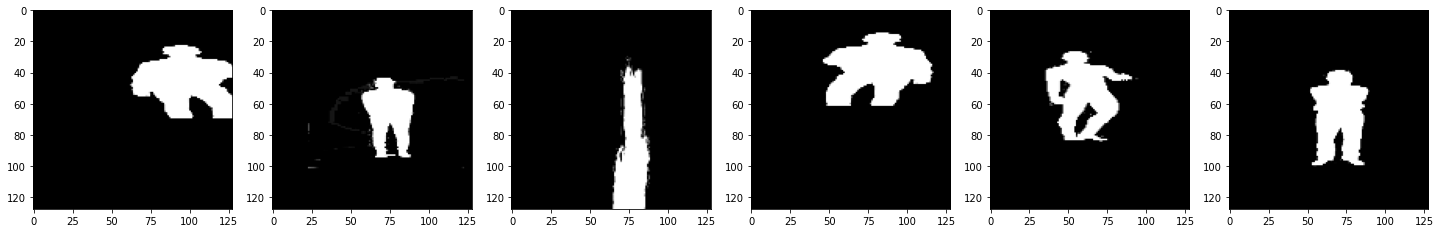

In [ ]:

f, axarr = plt.subplots(1,6)
f.set_figheight(25)
f.set_figwidth(25)

axarr[0].imshow(mpimg.imread('Masks/1bg/fg17/bg_mask1fg_17iter11.png'))
axarr[1].imshow(mpimg.imread('Masks/2bg/fg170/bg_mask2fg_170iter11.png'))
axarr[2].imshow(mpimg.imread('Masks/3bg/fg127/bg_mask3fg_127iter11.png'))
axarr[3].imshow(mpimg.imread('Masks/4bg/fg117/bg_mask4fg_117iter11.png'))
axarr[4].imshow(mpimg.imread('Masks/5bg/fg137/bg_mask5fg_137iter11.png'))
axarr[5].imshow(mpimg.imread('Masks/6bg/fg147/bg_mask6fg_147iter11.png'))